In [ ]:
print("Hello World")

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
num_links = 0 
k = 0
x = 0
df_joblinks = pd.DataFrame(columns = ['url'], index = range(1010))
print("Extracting job postings' URLs...")

while(num_links <1000) :
    url = "https://www.indeed.com/jobs?q=data+scientist&start="+str(x)
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    joblinks = doc.xpath('//div[@class = "jobsearch-SerpJobCard row  result"]//a[contains(@href,"/pagead/clk?")]//@href')
    for j in range(len(joblinks)) :
        df_joblinks.loc[k]["url"] = "https://www.indeed.com" + str(joblinks[j])
        k+=1
    num_links = num_links + len(joblinks)
    x+=10
    
print(num_links, " job postings' URLs extratced")

Extracting job postings' URLs...
1001  job postings' URLs extratced


In [ ]:
df_kw = pd.DataFrame(columns = ['Keywords', "Number of jobs"], index = range(3))
for l in range(3) :
    df_kw.loc[l]['Keywords'] = input("Search for a keyword ")
    df_kw.loc[l]['Number of jobs'] = 0

for l in range(3):  print(" ", df_kw.loc[l]['Keywords'])

Search for a keyword sql
Search for a keyword python
Search for a keyword hadoop
  sql
  python
  hadoop


In [10]:
import time
import datetime

jobdata = pd.DataFrame(columns=['Job title', 'Company', 'Location', 'Post date', 'Description', 'Webpage URL'], index=(range(num_links)))

print(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

for p in range(num_links) :
    url1 = df_joblinks.loc[p]["url"]
    jobdata.loc[p]['Webpage URL'] = url1
    print(p, url1)
    page = requests.get(url1)
    doc = lh.fromstring(page.content)
  
    jtitle =  doc.xpath('//h3[@class = "icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"]')
    if jtitle: 
        jobdata.loc[p]['Job title'] = jtitle[0].text_content()
  
    jcompany = doc.xpath('//div[@class="icl-u-lg-mr--sm icl-u-xs-mr--xs"]')
    if jcompany: 
        jobdata.loc[p]['Company'] = jcompany[0].text_content()
  
    jloc = doc.xpath('//div[not(@id) and not(@class)]')
    if jloc : 
        jobdata.loc[p]['Location'] = jloc[0].text_content()
        
    jdate = doc.xpath('//div[@class = "jobsearch-JobMetadataFooter"]/text()')
    if jdate :
        jobdata.loc[p]['Post date'] = jdate[0]
      
    jdes = doc.xpath('//div[@class = "jobsearch-JobComponent-description icl-u-xs-mt--md"]') 
    if jdes :
        jobdata.loc[p]['Description'] = jdes[0].text_content()
        for m in range(3) :
            for o in range(len(jdes)) :
                if df_kw.loc[m]['Keywords'] in jdes[o].text_content().lower() : 
                    df_kw.loc[m]['Number of jobs'] +=1
                    break     

print(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

2019-04-01 20:30:27
0 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGWZuEbPVTr33NbhjBwWfnYf4Fvd-syh3yNNrSpkaNyfUNcWCidu0S48qX9dh0RP7J3-q4InaoC5wAYF4rkKZPniZdXGIEOtieEniuOnpE-kFDhpvArWVg0xDnw_pZdbjI3KwgAZvGGbD5t3LiKx38EYNtuD-TIxHa9NmRHxGe4esSEX-A0ywYXV61i-4h87ZWjobaegp8jNs1_XmrHn4k2rqDDIfvO3OnvB7GSJxjsRZisH8t46txWIgNu0alkQvIiIrjjOLWm18RtoV9strW8W5jRQA2aMtYxo_XYKgFsogP_7kgLTluiw9pRhK_V-H7fOQCZukTJmmQLjwG0CJsRiEG8goamgmoodOwdDa_OqT-e8l9zkPaZpY0WGy6C2SPFR2vL1ApvWyJZbnPQxp7f8Pe3rNbeNmQFOwY-V-vyVc7Nzw0xweZz_VtJ4OROu2RXl9XKaK12GVaFhK3i789oFB3pBe4ptvHtjQ_sbQ2ako=&vjs=3&p=1&sk=&fvj=0
1 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzLjdpu6Qe9EwylrPkhy1n4b9EdYwiiUYW_rr-hqfnga50tUsE

17 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeJw3fSsSupobBHfOrwYo-mpAYBegcPePeyfaeukl6U4RplIpNAJdHuTCjLoXqa5pZOE4mGApisyBybKQd2a2UW54OyANFfl9LZS27UToHaIe6Mh0GbrKwCviM3btLcxHFqdzmawO2u4eUbmlF4UGnQKzFFhiOKgFBYrpx8TFrN9w62jkCxSHSa75J_Azm2LNntN_mNq3Nvy1hZOfHup9OGwD_FTV-pz6-gSuB8RblgLFTaV1BGkVQPFOCVN5pyeQMEgCXpxjOF8f&vjs=3&p=7&sk=&fvj=0
18 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB08Tqumre43kVONvPvG_aV23JSM13h2DlZ7ycollEXKkLH4900Z5AjGUC7vbjUnlT8K81GFSsBzqzlUiclsYGrbJwKQofbpskhl0UU7RG-nPTjxgEiGRi3JKKFfoL0-hWLi4F3i_Jz2a8k_zQGMwLOYbaYSAaP6W7eaUkiE3qZyGgplXPwW3tzGCrFgNkiFYp8dBHmg-vhTSiFCmQUSLgLhfEZVDlpnBB1DJPTmx2zyU25AaN78XvBgaINgHJPl4XMyL7oyoLZ-xBgIelamaqrQ==&vjs=3&p=1&sk=&fvj=1
19 https://w

34 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB08Tqumre43nlTYVIIHhj6d_ZuUiQio7dbBnqHkCjnh7Ltk6K45714XAjB1YlxM0kL3TaPhjtkLs6pRv0RxOC-ZgimZz6RSvjEkD0yj9RQSnMkRwSq-VzpMhbnSeCzaIs0QXmdefZW4Hmca--BW0EDvCSAmHPbiEQJOFlX5JrSQyvu4cHE3nvDxzohdJ9HSFthNcLzXR1iWrPY-hZ5-i7iKbGSbQW6iFfqhsDEsHFB7wpr31FuNz_VCfC94zJ7QTjKo7oiaEVT4OckUFRilEQGA==&vjs=3&p=4&sk=&fvj=1
35 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzl3btSHndTuXroHnKO7rfcABVuXwOGR_SOGQcPlFNAuu7FJ8QcMNP6Gfv_J4FNQPEeL77rIluOVS34DftC4BNrUyNck3o_lYZWum15pcWL2-r2EDjc2v6F3Dh0e6weCJ5NI9C-GT9RZA8sH-xvjzBF8v9yL4vj8acstHoHx5KfZ0C0ZZin6s77w2t-z1EnSYcyss7Sptd4qHq-rRq_j0p_pXneXuVHea_hhCN9dM8z8ev2cqxyNl6FzQsbrLauhhJLpsAs4UHev2WpOidQ6aIhw==&vjs=3&p=

51 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbxitvJcslKFS6LRbgpd1PRdCTDpQ1wzgxyMmLtwyXa89PLPXGAUGIXmTe83HM7Y3hCkU0dZ9zMUVMcpejmpbiIMqOoEag_Kyvrddl6rKbJUVfU4OdcM1pJ4PzCBx8p_lB1UPUT1dAkhMwqjrDkdJFfxjmsGXtxLRraTFlilZQQtwzjk6vHBz37fH7cnB5mR2oWq7f2IF3dWTWa3dwkkzf-KQg-7Y7zap-KYqRUqOlfDvihSB6VTpsviuj5pPuZvnPY=&vjs=3&p=7&sk=&fvj=1
52 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2IHR6rZasnyBOiQHR7wEozVE6G2c7M0GjgC7FsFpk6SQskEu-EPSqebMqJ_hP9_uOjhemtFEBFbDDqfaMQ5YKaStZAScnfsk2xmyJ0_Apl3aPHVoYiucTpxlFUNcfuOGn4OsfJ9zvuKeXIOgd1y4dDukKKuPBBAmfmDNRYGXUmjOYtSo-nsNn2ApZqZh3wsJVwS-T3WCR2_Mle5R-dtq8zKlLhG7XN3FtU_IiRxPv096i85D3xP8ARM8OTITHCMKe_LprZIoib2iVkRRZcOBZ-D&vjs=3&p=2&sk

68 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBEub_T77OhENt_KIUuFSuNoFneWYewcSuCJbh7OU6gSWrOlUgZduS1OSqQyWLtmuJgwnHDNjBClhQ7iNx0mcgBP1l2wtPWgBwxaqAQdeBiGeR5Dn0jRDrHuX_bSSkuNOi_G5ktS1BeocLLQeHVuUzqjPDihOR6hqiLS4rDCd6gBt4vcuUFRVK5yetipbq0yQQhXSJBnoeXPp7I_KucaWJp_XCTadOEx502uqyqTBBuZnKW-_cNWZC_LiO9bjf14H2-xc39VTvylarJIehP8Geyw==&vjs=3&p=4&sk=&fvj=1
69 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzl3btSHndTuWDn3Vmsp4XIbmetUnxWFTXo22eS4HIBQG092GbAAIWe3yrT7zH7ZBGK8mJvb1aOLkU32vC9XTT0yaJfkX7RuVkgpfBd4fO7NR5L1DlcoMcv-JUETEdVwMURwQIoLOkcaeEVj13PSTopGHsZihdhRB6iAB07BTne0ksbIplOHEiqyFESqA1km-ufPsEwIV4Sbtvdi7lU3na_xfEkAZKsV-yptNMijRrUWDG7BlazcQgFOP5Y5LhbYdO2bJWLgOdx17RzEavM2HREQ==&vjs=3&p=

85 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbygBlq1HbYLqDjd_858mXX3TuYUgHf4KHnw8ntT9m3SP3Cl0-U4ML2_VPzuG6no2zOdTq-_VtoI2JOzg-iJc_etFozsfx9uP52nYV6Qs0EZEjCkrZ92qwQQhmH9aj5B7dib98qj3FkzegKr3U77gkJxrJ30E7jlRqiQZCLJT0cNbvzMqujPXBQwz13KGFlkWltyCCRRxoQQvBEeatqONJRTVkVUYueHT8Jhw6dmE6MCI1fy8HGaPXqTONGlvB1AbSc=&vjs=3&p=7&sk=&fvj=1
86 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlARQY5NAzTCOWBw6mgwJRlnenJg68xdsyXTp0BI70RvhJ9ybJdFf2MYzPa4cffiAQaGaaI4__tNwAlDVQaYKKXPFQpc9_nRGLTGuToqh8K_SgirbsZ_89bO4-YTyaqF2AO_6yBLnC6SwOVgWzW727SblvSynf7M0coxvKcW64vWtQ_vjUPaO9K1cCVLZxXF0dH0KgzML6-puCwk0UOoJA20CiMasCgcZsOedmrAhzRGeicTv1Nlp8lOSfBWR-17gcWyu9N9HbknF&vjs=3&p=8&sk=&fvj=0
87 https://www.indeed.co

102 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeMDXVTcG5Pfo6GxSmzlUXpf-POXndXaYmjfGU8eq4tLimYu4dpFjWJc5oV9Qe3DKayTy9Lx7x5cDb_ma-ZUR0xvy93A6cbkVGMZ-u1BHXPMhybNIE_v34zC6THaXTa_oxnXn5mIhswYhjYKq3eZ19VlhMj6z9p_1T5fWxU1pVkrtvqFLT5Kik3vzxyckjKtxd-WBT-SM9xTQD5MZz7uD017zr161RqkunL29uKldKiaErUN0lKqpgpCkRU75WKhoUXsjDFgW2WkU&vjs=3&p=3&sk=&fvj=0
103 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBeDPchwGfOsetjpccs1g1HkV1jTVX2-nHA8i8xQyIgDF2XSKS7-cCXyBlA4dTIk7MP-fXSZcRpF5lwg2hc5EbSUVz0RnbSMhg7qrhvu7lUS4NMms_IykbNuAyCVmY4czeHo8utuwHmVf7d1pxqALR0N3p2sHB9pfEumAK6rVF1YS9ixtnl4KKN_vMokYQzLV93YsW5XzjUKAnAHLHRuenDqcdY9QPvOYKovxzlYL000pPJRPwXiu8mbGKKkZNYrX0-iFgTk4rzgelpDiVGr3v-Q==&vjs=3&p=4&sk=&fvj=1
104 https:

119 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlNp8cs6MFouLw6712qZRBnUXLkgZ6cWZx-_GNiRzprZwUzlF-G_vyAar41ZH6VaQurSJscuL_cntoHbl7PtaefxgJygJi360AurUWYzymfOl8u09cIt3U_3xH_yXdXwHmbYiYt76oAbwxY7sX16yrbv7uTsmbtycD9S4ikVIk0aMW4QVBVWOfi3yJLgKdUZMdhLyyVnfQHeLOGaXJee05cSFE31JMP4VS_avccRqY4nE6yQ3yACAtgxwzUj-uaXUl2RShHatlBO9&vjs=3&p=7&sk=&fvj=0
120 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2I7gHrK2i7bZx2aRp3-YzkmOx8nSMQRuqCCBVBo4dfO5XfdZGg9jAskhuKINaE_D_O5v5zcmKcerjXPxAYEK0icl4leL00bmBd_Y5VwD9y9PBdn7kq9DJixGemB9PK2ZZrHnBJ98Dup93rnaK7ybReG6a_5R6U4IL7iAXPybG6z9yXW4brPwor9uCIhNFFVvuBvKozTu5l-Yg9cwWtyg0voHtrDPLnqEapJYP0dnbo7O0jLLjFyHmtC6FiNt1wcdLEUMnaBoqtpcppIdc8s-3Oz&vjs=3&p=1&sk=&fvj=1
12

136 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzLf6_BDNoamAyYQ-_iVMW75SOZUwF5_gVGr0t-N6IEuytiws1J0ZEpTbF7RNxevzT3CzN4BTC_glrzNipp1fJs3haLHMn7emdkMhDQkzkCU73woWmNo1rjQu3Rjl9vcjfNocL_TwhlJhwQGnGjjsC-AKEjPzIl8JWbKEnkl7Ysgh1NWcwC9l1owXZiVR9h9T9XYGDJ_Lj-KhmvXqNcpdlVx1HPtWVCCFFJxTgVBOE0R7PWJFJjflXpS1FOWHGDz1keLdEIMOza9R1FiXSmW82lg==&vjs=3&p=4&sk=&fvj=1
137 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzDcozQ4QaSaHytlUQt-t5cCKH_RkUGIgHdtGX9sx4o1obGCmb5Wm4g6aRcUFdjXriTLIL5SRF85K9Ocxx-s78aRXlmqdUdjGr-4-6IrW2s_iNQsJpevniDrTJJCpIo0EB0_u2lOJC5EPCO0gsgpBHlc-GtPZrDCwcM_KPktuLHAZdzyf6dbSDbJKywMj2bvpQblxCnqe9_VeNmbeAqXL6Q6f3p1Nah14GNrG8kKErM_T5bBu121foyv4M7Nwq0kNI=&vjs=3&p=5&sk=&fvj=

152 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzLf6_BDNoamAboWq-zyVQzAuoG6JBL5mSl1YE--oTV4GMt7wXRxYw0q6x3U_lLoQs3Pay7sJdYjIrSFZdm6aI24y3FIQjI6nsOKhh9FoBshlJYIMz_fxwZkJGPpA6_WcaEh_5S8PnnoF3t9QXvOAAasYmleJkWnowdGrxuRVmQEUeNaVW07LpudFKTsfRLqDZNuM3x67t0tuAaA_fZn6_4E0WDDijd1memjU_KjqXoet4N82c3uy8tA6SE52uBZOT1gs1UarQQ8cgNDYvOy3zjw==&vjs=3&p=6&sk=&fvj=1
153 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeCizP48Ue8x7Dj4xWgT3t54fCjeG4WnQVJr7wn3gTSEWafRppoOUFyh8jixmFFSjeUhGaktkAFfWWoi2iT3rXR9cfvTn5ahkr29V0I3JjgMDNOcHX-KKw7RHtWCFwvHV7E381M3F2vcdyTPiDXWqU2JGGDuCIIk6W6nLSZBc4DdRk6PLmwhgqlhWbLB0L2UrVJVhruX4mOwd5CPfyj2slXoWjz9P05cGLZJPyqiyuVoYq-6kJCHW8mK4GB2FTHhyhmsOt0nQtjNu&vjs=3&p=7&sk=&fvj=0
154 https:

169 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoOGnj_B-UoUQLzLMcG9MB7j2UsYUGMqt4S7PVoOl2x6Ytz8HHP8qV9Uuz6_kItCwBbzcEyRzRFsKB7LPSv5zXPTLBrg03ldQcTizmKSYHXZ7V3fRXVRiFYnG3ScyupH-1bzZKMxra97WuxXPlo2E6OlFno4hzzJQ9nymsDv72SpQEWBJiwU36JhPHjaThggLPv2hPmCpKruwYqKv3zpa10m4LW1hRVT5J-N3c1X08cm4inKBy-4D2tYYmPoHidiXYddBR4s6MxxzZTjX9o0EkmV_hUO5or47wcludpNtVAuk&vjs=3&p=2&sk=&fvj=0
170 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzLf6_BDNoamCzka3G5mfzZF6meanIzxj38zV-Sn-m95OY3xKg-bpe47LTIs9E-ebuJ8jT_bTcEeSKEFicwQwqlqDsfpX2D6KBpkaEBvfHAUPZY2CT0TRevz6n5pM9wN6PY4fud2x-Cni0oyQ7BchUHrmLk1Ds6SdNk4dX-aWzkIvSyjQk6Gf5sRDXOJD1hCngIiob4Q4FXZtHvm_0X5xdNzxbe2pzgEDyKCDSljQAvow-dxBlrnm25FIu1zonCTFR292b10JRzSrIjWgtyLXGhA=

185 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkePaVBRymGZQodl3e0RD17g_v_Yuf785kTJyA-rgwrpwWyqbDm6lTKFn3bINWnqwA_Y-ev95AwQfQtJ2wQ8ZxioKKKLPIZP40NghPIZtU-1msqq5eCjcHUvIvgtkXnKVtMLndDofYRGK_n35jwjgIMAUrzVFuw3Yjxa1X8fat2g2VrHZDDCJvYZJdxzWyBXmRKQXDsF5YR1FBY8__0ToRfQ5Ix_BB7v_gMUO2p9cSRABhI47-xVU-a5_IAvul57T_LHS8ovkOp7sG&vjs=3&p=2&sk=&fvj=0
186 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlNp8cs6MFouLvznQ51L_Ez2HfVQZxIokm6zf8Ti41AmuKDM3TK3K3SohFlBT1dXAUPDJyXTkQaBNu0Qo-Y0FIpuAZqg7sb5zIXMoOSD-mJodX7IjUqG9oBv9RPMRH_Jt7-SOtsuPxBcmPExKfJra-dwNIW2-iupc5O6Kfdh61DzA3dQeetFVfqx2GowNFZeYBkch7QVM9ODnGzAbhZx9hjLueynJR0uTm4ZATDqfKMgrz17aZwPeFM36YYh47Xnde6MutrEl_U6F&vjs=3&p=3&sk=&fvj=0
187 https://www.indeed.com/pagead/

202 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoOH1PwG6MoPELs4a_MIYjauqb2VBKu5sJ928Fv8uREEqVoht90c-YpwcgEwYKNm2PorIUdd0eYk6mE3PPNCv0qvHTNojenqm4dJDzmk9oRZrkkrb9ibA-24-ta10PZ_K5bmSbXEybCBsd_QwSoFVLSRsJCs8yfkPFjcBF2k7DZUYwrf13jhKcECBbGSnTnGYKNt9ZyyuK06ciVntKMhboswMKvNvw-rfhH7BsW7IPqwNZipD7v19O4MBU3qsfPTz11RnZjfFniXdk0-M9_pl5mbQ==&vjs=3&p=6&sk=&fvj=1
203 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbyABkS8N3N4Y9Zk1y5Yup-pWeczHyfzy0daIKE88FlUTBNSrF3rgmiwxM2Xsy4v8P8P9K5XWCKgXWc9efC1AJHFsVvOSUszHaIiCsDH3eih961c6D3fLZExAtk4ydCW37DWJoubnkmr3wRMAqvuOOftysCQIIkA1TNWLSqx_su_4OGe-Ocaqa5LGD_iIzCwjY9mbx39UM4nOJI0PG7stdg8ocIPlFL7khtQaIswACx3n3e6z-xp5wsCfdpgFz5KqOI=&vjs=3&p=7&sk=&fvj=

219 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeIN-OqXpf8goEKxWUaPB1DZTW3fkxr31_hRLozghAWC2H481FmUaRhoKH_FeP0aEZXOf1yUicWK1G5gp2VQldNJiG8T-OGhHMTKC9EkTtQtrnzEgMfNGSx9m5jDRzM6cb7JVH2bdwWzc3iaIa2PbWJSRSj96H1yw0JC7FyQtlD3jFgZWNDUVo8LtXH6ugLmwkl9FtlRNlK9xAFq44n5A7I3-a3Eedcf_zTAzEvCQhS036KgHW5N3gxK5TXThCPfvzAJgTs7zlKT0&vjs=3&p=4&sk=&fvj=0
220 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoOmJdU1Ty9Zpz7z9ZEjTL5dmD-FzGHHRWLdCDRNOMhefzZ3jPEjBNk8PVzAzJIifxdQ5DPJeHN6lOA5bThZzfyNe7_OKx1Lvz2ULdpuKPJpQxBvpOH9-1hgdtH2Qj3OIe5cfsJkQycN4OcMf9ss1z-352i81OmHNUNtXZd60tZqel-_AWxa4jwJ3Xt1uQPkiDriflaM5_NupqHYMu6zrJZhBH2wfIAYGKdRW8WknIBQ2tiD2l2o_IoI_AI6DUDGhB45bevhd91Yn8IDoz5IQwSMw==&vjs=3&p=5&sk=&fvj=1
221 https:

236 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzLf6_BDNoamD4GFl2bBnCmS76R7aqzIVXYMSH65AeBZD_4xqsGyMPxCyCqpiJq6cvxXBq8IseG3uT-ZDR-A_DFiiDtp7I6AEsTqH-Leszh0OSWfqWwSaPoQh4u2RkKqqwA4JSu8wpSTEP5WsLTiTfLNIhU6vmmzAEnl_g68u5qmaVXm7Dn1RtDBAViw4ucdOJj14U314YN2wVfgr-J2kSwGJvyBqGYt7XqRdUp-DRcUDbrX9faqA7tx6AF82AwX3b5IyBRrAAsGGWXeYzT5xzCA==&vjs=3&p=2&sk=&fvj=1
237 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGVgOy0YQmGIurFvL4BLdnUopplQt1wJjXW7zxSawfOP9rMyPar63-SkuVvwjsGIigMOG2yxTLgt46_1IlcCq-90ETvXb4EGyfAMANvALEIBnJCkZwZtXBQa4mmsMtgmJDuzbp0DHFJf6rc2GTdzVFHZJRk94NZcwSqoEG3XAtLC6w8IEHkZ1mLjRM6ruGcL6EM4TosAG4kGI9maWWYAJcwzKIEpwMUGbptwlBgpae0C9VRkZbwBEQ02fJA2kbGZFg-lbwW5e2VplH5w9390WLZhJHVCm9CFb

251 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2JtvWQFe367X4snvmL_EUrIV9oHb8dgeezpF1Xl_0NoIfXB2GU-vd4i019V1BBqF-_PlQSBPrTP8fOaNtrtEWTNGIn288QM6vcjqtI9m-VlJu6g9494-WjiRoe1mbu4LW_JVWdaAy6sCp6CknnrtnHpy82p16zTDOwRzz4mbZOUhwzZurxEjZBer1k-VqlzJgDj3NmGXOYBulrt5jVUIk_cJj5uwvjzKKOcEln7zAfSjtpgpRdFgMI_xKyDfSt01BvmurEwy3M-yj8azB1W2G8Q&vjs=3&p=4&sk=&fvj=1
252 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoOxNczZEyzASG-reLwEvSHQ49XYydcJWa6wA8AZMQx6dHIuCxdkKa8E9dq020hYuXl_GqvyWpJ7sOLq1BS9RyJP5mPm_OsyqJYchEulzeV21zyQglECG8ns7MHRMZdoOrciUGqaxEg1iFUSphO2KbAZUSUBEMIXImpGJjRjuIuf8mmyxHyER5yDgp3wK4U2GOE8iNkkcEcJiou3eyGpL6wE1r2wsU6BXf10OItiT4LnJJ2LaMxgqRC8lSZv8Bn-9QWrU736alhP-Mg9Xtcfrshrw=

267 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoO38THkCbf_lx7Z5Es64fOI0j9POJ6RPXkYkwf6tE3VzkIgqv6rl-XdNgiCGfSzUVISLIwX8ZgOu7uO0IkcvPHK_kwJfHtIeLmiFQcg-67F4m13NnK2cZ6Gq8NSUQ5bRgDficQ1KY22Zkud6_DJrV4JyNdY8LqMV7H_Vh8-ekN3e4IT5ffU4-SJJkvAZIJvx_pGCTX5lA4zI3xEVdCYKx-e2LAFZqJdi0owaeZhf3NFjO8svf59-LeVR2dVuYVIVckHMDmFByO6338hGRUK9OYPA==&vjs=3&p=2&sk=&fvj=1
268 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHby8cqBPls4uisxREGSEMoAO5wbxhU36SWCtsNl1uc2cdykyVA4YqkNXIf1wGon_vM0CJWoUzdEPieBrIVnXDTnjC3Y4PMhi_3w5lG9-lmehZdcFZc95CazAJoXYGxJHVDzNGphdd9nB_rXFW9yhTUKDzLiCFlEiX8grfEEwvNKMnMVZud3MIEjUO_2fu0dHCXW-RvdFan7SHpH9vcO0OIUBJW4m48Eg3MP3KlphvlvGWMw2aDV3Ftaj6fMyWxwPYwg=&vjs=3&p=3&sk=&fvj=

284 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzFCXxkrXViVuM04xxgmZKlIWE1Y3sGb6aK4nSGgLEUndHzX31mDPUYDxtUTK8zeW5lmWskocmOoBnsjyRKVqwVfJdAsWaVDlQbMtBJDU745p0GRiKyCl5kRYUtdZ_d-lRKzgUaFdpTXm4g232sas3qLO5s4-iCMVM38C6vzJxW9W9MiyNSdG3Ww85xam9NB_w4seN304oBplVNTnEZDQzII9lNnAWnldcq-YkvqJRNVA0mcXzXSADZMiQ9FIngxB0=&vjs=3&p=7&sk=&fvj=1
285 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2LqRJhtrygLj3xFTcKhv4B0EKSB75Pt0o_FdlvG14ifx19zi9IIlEIKq7CwJiGJS6qIk18s9A_v6-4RpqaHAGcrUCIdCHLP5DeUSygwBvqY_QCUQx9dgclrT2AiAkXZRmAOtRIgOkyIA914nkoX1nfGcdYtXzGwQHX2M4_s9KUdsnmC9M1RERS-yROhc5w0jk75vfVGZACv8k8PmbX9Lm4G8BiAApxYmqbOoFNj_roA6E6UN0cRxvacZIKffnJQL2MeBma1RX-a50ximidYivhW&vjs=3&p=1&

301 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB2hCR-r7fvJEq3hPhVgtEXVLPdnjjZK-MIMS9dwnHKtkZEcnMPvqxwvmXyydeH1ruYMriO-xTGE7FB3jj_sh5e07XdG80_YRr0HTY-gaeUBZdncIhgUAzhwkDUn7YMtEqZVyo7GpJDMLpuWZjZMwOlZ4gfohNbAzvuKIzzQfaXpiMHmJcYhidRbzQImWpbhOLHoCp43zzh29wsKCTamne9OUuOIYim7Pl1E-WGyYNh5gj7lq2_sDa9Cfs8uDKGvDqo-BPe9yT0oYc2yKd8A5rmQ==&vjs=3&p=3&sk=&fvj=1
302 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abznQgymJ8DpyIgpQJZKs-sNT8B-xQKi9JaYHXvKcXuRU5EDAfRB1YETM8I4FSfjk_XyFG6-7moCYLv9B_TspvYjy-KoelAluwJn42lotFfQyyIbpnGh86O-EKfDqr_ip5C4ItQjzOsYgOFJTAC61pOVxq-C_DtjZgGY9Ru1xTcg1pbd8scX4sH2wJaFal9iQoBMAYRVC7OQZ99EO14d8DAYQPQpq_uYhFbtREbSy2JH927gjMeQtGRvoTZXMdryNXM3avM7gdcQv1M187AkzhYmA==&vjs=3&

317 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeBXrETprAhKF1qUus88vVImP34qnaFOOHclXZVDzJcK6bi2XwDdzcfG0Ge8iMhPCUs0JUOslAY7YICjz7jAcyyiMGKyBYW2iGPvjezEpARR042RnEjeMqn5_aJ6HK5yv-k-7jMP1rXuL2O8lT5b2EuL8jaP5eMrQFqPF59yRLw3_h_gvz0tercpIfQYnSadF-4qBFpg348LxOszMybw2EOSyjTsevfC8r6904lwNURNYm4VTmMRSvOA6-pzrIKezCZEMu2J7lhcz&vjs=3&p=4&sk=&fvj=0
318 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB1-_XCAWEMpNh7a6-Cu05EfJKSNOUbu32NyZZLOoPy-HO5pu1g7s28DQ-u29DpPF8KzKSZCJZujDUytbqiTR_YHAKqXz18eabqOiCRsKNi-hPje8NT4VzvBlznvXLCY4usI4zjV1g2jGaTdWwgPjg5E68XCKYHDh2Gz_J_087JTiGUfVSnfK02fitygALFO6brbrdGnPL__jbafCE1apaGtIX9eOvqg1sfADdFIORJLBNchMAK1a2_GF40HJ9SVHrZ2ATPyAw7_cS-fdukj0QEA==&vjs=3&p=5&sk=&fvj=1
319 https:

333 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeAVjXiPjZKax2XE_wzbsId8roVUhTB69afvlQADNIo_R5eGCvNySxudSTEInPXRh66C-d9mPgmjRxuGFIGIwwa7oDx-b4AhvHqey4XGMWNyg1-scJz4dDX0uEOZGZbJ-fcLGJeZ--CRsNZxBmpDJSISjrsLtolU5E9g9SQRy2ZvF47bGml0GbdjbaTxMRGMvwa8eRXxmrMTafEJsQDdD3bI3jJdFBGdm9JUtSUuJmQbzTLZcv3H8im_FIi5Ev-Nes4NqIsIds9mm&vjs=3&p=4&sk=&fvj=0
334 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB3LkZU1XZA8dXiUYpwS1hJJYtpEUmNC0yWuF-_gQUFn1ULOhvVy6Hjo-3QsUMQ1CZeWkabAFV5RMz2bl1_dlLfocRGisQBhLfY-gqLKNFAqA0M_x-U6mgw3Iw-_YMb47NOuXQ8C9v3B0vOhYe_XTok2stlL8gJyRY21JHfd7LlLomGqGmGJSoEWOywYec3fFq42NLpmbrn0st6FLQ6SgPlbBYoJFGmz6rbtcOftcoF6B1D-IDhz2A55sdljaQwGVccvLSvHiG0KUzj0tDMVA4Eg==&vjs=3&p=5&sk=&fvj=1
335 https:

349 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abznQgymJ8DpyKe0O-ABHEKtjxntAgZkH0XS8Xo278LH0PqfWjVRci50a_tL7teQheu7ZrhgUDmy2KLsDGXYSN2QqZ4bWTGHtsRx8T_qXC8G4PKWHfG7m-Mp6vIzu7PhlBg-kO0xWGJH6depY-6bpyiKB3HbG8yKf_rU86Oc1Ehz6_DeSeN54nWAejtrT_vz9-s1N56urCBJKTK1VbwglwtSuFu0T6h53kXvHQL_1DecpIUdlrczQlXOkEAkC1WRhqNOAzmc59sJusvKJlz-FHd3A==&vjs=3&p=4&sk=&fvj=1
350 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlOQK_7xQrN89uAerAIh9-gnyvqtyoejj_j70xdxqs3L54UGgW-JV1U84l-2te0QeKz6xFEuffJsbO3eudgqi-3gtvwo8vIicZ7z-WN-t0nC8bN4aAF-G4CviJh1ibKr6RIbfwBufs0jAP5igw_3TAdl55i0qfw15wTva8_VUZkBa_4l37rcj1OXLXK9PvV4UUfnWZEmijgQ9L6GiCq1pR8KP8i5JOZgWHACBdPk60YpTAhwy55SN0NeslE2hGmAPToDygLxYsJyH&vjs=3&p=5&sk=&fvj=0
351 https:

365 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoORDTV3HWVV1364XgQwNXDX_0SU05R9LGJkAlF_Q9EING6O6YQeEhUGHNhFa1TWq0kuNMlBJqX2Y9y4Px1hd5a5pc3A5zns9hG0-5r3mKsNY-obazhoEpPXff3ALYtiJOBIYD54wAHXRv5MbQo1fMnTVUEYJxFQHRAvnH1GVqObXlxP6T3FLg4NJfvwWyUHCuFveVNj9KV-A4rKas4Rz4zX3UeZ_E201n9heSZZpr1VEvmZMsoYD_3OE3t48zZbaY63DAqwH8z2mLVb-Lg5RZ0Fw==&vjs=3&p=4&sk=&fvj=1
366 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbxs7uMn02omWn85U6uUTXAlsqpmOkPB4iBacZUep5Bmjtcj_AEzvDLpu7TWsuDZztGuMxLWn-bjqB0J2w3IaLhIkbaUffsb4LLgxB8b0rpqsLQvuE3X9Kw44FhWZkdzbqaQCqHPWxFr0ZxkKlT3oHvDapcP8jwyIrcevfc_NuhaOaW-PT0XZrGZfY29twQHZnMPCyoHYf0lwg9J6bn8NLRcfB0gf0HuW7_tfAflij_1gmTWV8MlL9dc0SDcsoymohg=&vjs=3&p=5&sk=&fvj=

381 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGd6ma5uIxfy7Z2B_1hu1ffPDoh5dtMm4GfhyvN4TPYn5klYHT-l1TfBPayb2h0M9ZQgJyCKdgMhi37_fFo4VBUKZV8OXuwSuqAqsiqowzO9M5bn98bC2kSxaWhPVcn3Av9GaFM5TAtHhszZvHuylnMugNFSklt6RMOpxYC2us6CDaJD1t1JRufSL6qVlylK4DfoKIN4A45pVoNm1y5xSrXDKJHf-UVJLXxNKSN8Q8Zu0P8ymlvmNusNtTc5VBertWDHocRnMbVNUKR0nFfe6ZqhqUTqeawmXZJmhtbiWCZrMXiNEY1XgZIsa7P6Dm7ewBXccVpVGiCbPFofWpwaYuZ3h1zvHNulCmQJleWIa8M1ex5aZAEnK_2UDBAC2utWpCUwwghVEdJsOOC9jmh_lctXxSpm6pbfFHH1VnetZxlofncHElX_atNUq9-Tm4Zmj4CrNU38Sqs19EItQ1qeLNu3WaL15KTEIh93_CMLdPYmI=&vjs=3&p=1&sk=&fvj=0
382 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abznQgymJ8DpyIaoOykrpF4a7JKcZjG5ZxyVH7Xobcj_pEs86CWWlyDqrbRQ3cMB1PTI3iPTpMOJDu

397 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBDnS3y5xFxiLi1AM28Eq8TYhwLynUmZbpYddp62np5PIIOHbmAaVaaQ4Tt1RW2BZ8mQJ-fnFf7YbpJt-RUUwyx2WSTT59oUKb97OoFPTqJ2vS2KmtDx3ndX9TxQVTF6uV0HMujvTbUW4bs7Ai0elwv_WBeGR3gfJe1Md8KCjVuvW8H8v5n5sIIe8vl2rc4WI7EAAnJ-wwPA8cN1GWDWWl5eN32xqb6Y8B1E0uZvSuxfOEPOZTRl2TGIdtSQxI7Z6fBFjL6nQpczfkpdb_qIYIRA==&vjs=3&p=4&sk=&fvj=1
398 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoOGGmU83alZZIKWi4QDpA5K2BJ4RhUdswp0p9CXYWR1e6rrBS4-_3FhmcVxV7Ie0NiEv7sv0JZIvz887PsukFahmEntxPtEQYE7hPhDmPxKjRcGpG6digGHDueQBYkCHf1_Q4SsmY0ylQ00Ag0wUJ2t6sdnsyfxtJo4MZOYiWjxdAV375NQekmQier209_MBd9vHap5oqoE2niVqIFIrty7XJFONWKuIBdo2wRptp_u3EVqYcNDBOaIgFuZ1aeuD6a9f_YYf254HjQszfcfdf1Gw==&vjs=3&

413 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlPT91JZn332a6MxLLtT-vGtJAKfOFCV-mBoh4oeDtGqgLWttSttFiBP3y4C0HJ4ggX4CoLGGrIpyH5AWdyYQh81qCVkk-uUj_beSFqlLsjoEH2ELGtOzqH0g_MwF_w2VSX7noNjl0V_IFg1efnXh-tZTLr1JGLvUIYrVoDA5GG6UqI9Awyfj_lzRmdHNJgiSWLRmclygXtaa4dhYfW0EpCY744vAochcTw8D1rHjZcmMnvgSRNZTXfh_BeV8M1OY-fuyGzslEZam&vjs=3&p=4&sk=&fvj=0
414 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeOw6hOZS_PrTEe_Uxui4wbjB4jIHFfddxF95KMJmC3FlsPHUYkjRp-50-dkkJP2651ncqmPUQxBuQHjJuHW-of3Su89oK9wCf3yV31mLPrGSZWE9oN9PvFWUWN6PnfTWW_SSJxkdGonnODSA4p31zGW4tEsuMml-7oFClgSelSkASgMYCnDUo9tTqhjYiCaJornVAhsKLNsjwcS6nf69E8-QfsrgtWaSdZiqfA8LPg2XnwM9XrlKbMUuqlG0TsrihzQtdhNwE3rj&vjs=3&p=5&sk=&fvj=0
415 https://www.indeed.com/pagead/

429 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzfj2FaSjjueCqDKaRzHVqt990feCgCThqhdpj4ReaAslDV95Ia6YLMnBIbKpFRJEKd15Q4zKCOwSUhK-c7AFL341ZGZGOy3z-Mom6KZS97j9NBFVXLGausuO57QhQTr1vip4u3FdGn-SfSSfRrOJjksOArphWhHF9U8wvNXKgLKOyyj9AT6yUJVL1vkqasZGg33LVIh8IvGWKfEH35AVIwg1K_742vHQqKL3IW1xydEn2hrtDplvi8J2LQsdYYC712NlUNgPC--Me90kFVJKwBQ==&vjs=3&p=6&sk=&fvj=1
430 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSG-AtGYc_SeMUGJC6zKeAKUxQZI6V21MtprdSe0zbKkM3N5gTiWnGkUkPupiokFbOYbJBFqcV1mtrXuEel66Q3wDxSdggCZdDwr_JSl5BjsblAa7x3Hk0MXS46kRlwGM8O5IXalatyrk7UzWP0rz_-Zqs3iBk9tIi-M9Gx9AUaDuVF1TiIqey3bUkf34J0Qhd74Md4m32w47z4q-2MgsN_CksKAV4cUcX6Jxq_hQhJ0cMvAboHNBnuHyppuvdG2gY47nFlgoe-XLR7OEux4hruihUeFA-zjbe

445 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2LxCQg5iDHs6DofZ51a4rLBS1rjFM7IZlKg8vF3Upipm_siWULNmZ9Owlib-9sFE4hcNGnsRoNKCbE2n5C8-Op36rIvxkPhFD0MVf8tBkLqajv9aZEaVCBJqTqTlhia0vKoJu_i5spnlYZt-yfB9qAlVNlkiVIaHfuPWDOlei-LorOQvr9r9iuUcPKJlG-sJlVOJJsIC2OnQUnr7N8OVu47d9Tzmnnvlmkrb9pNiVro7dQWxwHUxd4c3rli1C9safq1XkBplmiGNrxtqKVTOkZt&vjs=3&p=1&sk=&fvj=1
446 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzfj2FaSjjueDU6wrW5DIbAhhfGS6aNlqszNC4T3HpuEitCTsddFFOYdvBzXgyIS3tQMXjLOV3wTVKKnsExnyqrJU7f1ZXbBniwkpTnVrhRs8uMHAOt2YI2_WM4_lmegvpp06JUHf66JWyrFicBtmN6QOgmjvDGF2B-xIxU3j7fv0xK25rUZzAWo9l_MZtwDye0xXcdSgQzvJoNn2_ljNsX_6KZt8PisssooNLjBiNCGJAQG-epbVcT54N54uMWeb4-7Z8_deZenPSUQlo-c-xwg=

462 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBxppZI4ZBkUOhGXnVv-5WTAGS241RahYDPKPb7UdtPa90C6Z15OMuF4LMa6mTNcU31wIrlxIheO8uvIoTcBDcIf2nRR_k6n5fLdREZOz3xKiRofzmfphYWy6YlorgkTXjca-hd0ao63rQrzPh6UDn0mMfj4JU36Sko1AaYEPj3xGAw5sfY6PrEhZdWJ-l5FP1n-3je-lMYI6G6j8nAo3q0I-X4FNBk3oaOkqU7oGD1MH1EYwped4hZqT62f47vxnsE1UED2L1A8M-xn4PYBmZYA==&vjs=3&p=4&sk=&fvj=1
463 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BkmKLVktVXx1WHNhCKYDvKLqwLPmvhSg5YQEBTPJpYi0s_keDRKL5jhz3kpOgEaTyhMPPS5Df69je3_4lsq2U6Hz_D0_ZbbYoA43Byv2rqNEF3mi3e8f3JussjskD_gqG-EazJZ5CIZFVua_x4WMoOF684uF6QLT7rJz_HffgD9oZdOdrunfqFYDXlL6O8xAwEN7OUcJfuIRdmXqTiv2CXnChOaw07hVZ9SuVgRoofUAEZCYMcsRv_LrNI9s4jwA0d6ab6NEqGCDe_B5zOmQVjQ6fjMOUnO-mMWfufXmWkDBeNgscplyPW_wPMIsuAWQV_InS4YRB4Sf1Ws_RVqyH71lQ7gzWbKTnTKLWlmyzPeXAuUFk3pjneww9EE_FPIpaJSsCcEU8o4iTWWgdj-J-tfr2ugD9YPYlu_2QRNHt9vQ==&vjs=3&

479 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlPT91JZn332a-eoAhNcbjNbnDWyPc3txdpaEtC5GVpvQe05YC_5k7087EFi_w2zh7Y28SK_O0PTVyATxYAPu_LyL-EpG0wZZwKCaYpVb15KhfF3XDKLPFBWtTstrCD0X2DhEehIu10twuXi0ptgKlX-MksP7rJkNfn8eRq4k08pRYZDPVbdC9dxw93wGAlM1-NiHXcfnwUk5PUQnasSD2YPZUtfvpeeUIOam1CdL8e55D7yUbaCrZy7NG9yhADFwy7d1gjeeLYWG&vjs=3&p=7&sk=&fvj=0
480 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2J6MJRh8U7OJjH497d99LI0zBzKUNZZlz8G7kRXaTGIJO6rdmLfvouIlC19OaKLxTaI5PjZF4R5E3QX9EaKxztnZIRIEWA-CjUU5KWNIk1mWHpNpkDKsx9aOxjeUOLvVUUCtzvSApBfupR9mICbKMNPDwF2dTGeS7F-d4btKIR6PeqDUOu22qRn9Dn2tmohfArrBNU1-JeOQPADGtfzm2PwOVF-g8mgyTQp2eHE__mlF_jBddz0BitvqpEl0lyNxUN2KQvto7FpKxOwPbfWSlZ9&vjs=3&p=1&sk=&fvj=1
48

495 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzufAwzAkdbyeJwa1ueEYsAZXq2GaJBw5sI15Jy4PLF4INmTQ-H03TTuOlISRlaUt9WJuzIAXZx_99meX9VgswxZZN_8EsXLCyjGM850oe7HJCKC6NStPJG57QZftMzRtmguYlV5oX9QZgeRZBnrR1IhxmyPpVfeD9ZQ2fjVgwnJjFEPnBsuMBGHzNpuHM2Y5cWzq2zmDVAADLJjFSUq9jb_flQxt45bDxYBw_zuJrmLqAbDTbtYJ1JPCAIs5Zq-gA=&vjs=3&p=3&sk=&fvj=1
496 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlPT91JZn332aTqnPGMeOLjgDQcMUQxbCooBEDjJ8vBzk9s9TJmsZ6lBuRirNennX4YV0pdgtS4AWux29p1bR1zCprEmVNHTM4wswsJ7O24wWLmkH6qRCRAiIDjyVNSBMxy-JvMP5xO8LYpxicclJgCO7_Y_R7koO2GB_2P_OcR64KMDIO5eTwy3euR8TBFhFOc6nqoBz6OGgEedNHHjwMgJFLLQKDpdxbvqt__JHHq9NBfAIfHeQW49fKQtghO0IsM3Krb12tx4A&vjs=3&p=4&sk=&fvj=0
497 https://www.indeed

511 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzfj2FaSjjueAxO62VmZ_7FLiAw-DrxpkP4JNC1ijZ5T_Ot16gIZFg-vIePsSt8Sov0vEdaMCdFblDuvuO1z-rBNFyZWfwLhQEZlVy3v7lCiYonqzy4Nj2TmLUDx1gNGgadI2K3CMbngBA3cBeyg7C6zJu13pfXBE_JAU6YYs7dnylWVwW3LntKhlBQmGDREgQDIbJvhBNE1aZMU40BVR3WLvo-qIaiK0AhP6OEpq-lrs4VvQ-rR8rPE7nmjZJ8ygrZ_SLb_CoK-XOpyHpo29ylg==&vjs=3&p=5&sk=&fvj=1
512 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbwgyUUkLHeYykDWD75GN0KQMBEg-DAeggl1UR2BqLiU4VOKxgowm-h4c9vU83KWneGaioPq9zZLfQWaJRIBTXpMNJreLNi5GXhfueTCJbui0e8H7oHDCfge3-2D7fXCyRnBRJapzriA6Af0ZzLr_dO5pmEclaZUSBjaTL4yzCQzeeqp3pue8MXPwfwPvTIaq_9R2ECgxrl8CTtMGoAUOM5HWX5cy6Q-tzMR5k2XZKwZ7_Tp2Tf0v4nfebrvQCXwz8M=&vjs=3&p=6&sk=&fvj=

527 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbwCJ-8c4VzmcnVWC8AGSdvaKSYlFaKsxvThRiF5uqPtW-2RapqKuHEaWTYAzCk7HepYCuTR_r1isuL33yQTCnSQKeBodlE_cjtqhMc_79_KJlZ68Sd25mi8ZBkTXPKXOfKKqkRYMDhZ0TS8BqwrO4y94kTMYH3jgyy_Qacf8CswhsqmA0uY79XhrLImbPdPJ-TaS78V71-UrsbxvWur1ZvEdht9WavJwZnv4oAh0FJV8WoC_eJch4FexQJm_9H2nxg=&vjs=3&p=3&sk=&fvj=1
528 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlPT91JZn332a-wMIVzSIlVeSKoZkMfIr1BqbXX0Jx9eF-kjOWUpNkLiZzdK7U5keLNnPahpeDTr6NzjoCVwcsg8WWbyajOlWNqSAw6OLSbHhkK6wE2br2DtPxja-yuJ2gYztuV5mMBr6brQph1D0CDSZhiejn8Mn9dPBjuUl8NuJzJueG0ZjzMRmHM5xDbm5nBKNpiTZxLFkDHiul34re_CUYBPUZBaU2t01dm-4AqKLjbgTLQZjEiMUzhUeclcCaq9UjzMKLwHC&vjs=3&p=4&sk=&fvj=0
529 https://www.indeed

544 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlPT91JZn332avH3bQgS93T6fKAJFCW5UUxq0di12WsIJ6iXA_SOOzVB7ykeLnwdMNQfU_hAwk37BmSwU7A-fmAC09wF1cdMGHzAYLRptrqRuG2IMnAmy9l9LwAZvVPyqh4Iq22yDGyRSmaxYyDdKQYXnkmB04saUMN1LomrGgI_W669-hM2uEIl20IVOTH3-85g_xXiPaRzGwB-zCvHH069iEXzxvSn1u5qv6ldx03LsqPDmYS1lrBiiPeb0bTpPpTPoLeCQeJZI&vjs=3&p=4&sk=&fvj=0
545 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBsdUP7pOw-n4e57ceSmp-BxnjG_oC_sBjyk8dEvqlqWEtPRprcTzqRmey3vbTieC8IYrO21HgtkpOK5Iyl9biKo07cy8DKKqP1BipdDWskoD8g00vjIQeX7ItnvhlwE1DEXU43e2nk0dUz0nhIqy-HOyXPeopZbcIlEsDBvZdMs5ZIKL-b5LJVhJB3nyR9pB3szdNPvWNClDWLomiViojBphDyLl0cuUGuvavuKzr2k8om_M5sFv6wV1HJyPSakaoSerY_lAQ8JEUAK2NNZqPUg==&vjs=3&p=5&sk=&fvj=1
546 https:

561 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeLe4qwYtk9ZIiQubxhnl6aVXkdFX5D17aERgJ6CE9AAODCvT0B87eDaowmmj-V4mOYXZ10e8TXwdF67WBvJxqfxnmk9rBSTPOEWaMSLB-U11phkmWBDwcz1nSTC_rxhqwO85I-84bi7FfTjYhfjzVQygmvWCoT2OOV6GgelH60tkATWRmBhmMmaHpqzgWD9m3pHSn4tWWT-8SEEL4dBdlZM8mogPwIdkxTtXZ_kojAHJsKmLs9Ed_HXr8EmOZz8wZeQRmFe5KBDy&vjs=3&p=2&sk=&fvj=0
562 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlDRrQBk9RJKMgJxJ_fNxD-b_7c67MGPabdyRIhDxZz1jQGPmM_amGrJT8HovKJ_oIwMAeqgocXu4fsWUSsqwGAjqGVmqmaz2LtHhWRKSDpA0cWAdQBECXM45tNU5ehqtv0ernedUD72itC_1n0AB4beH8duWPYgGe9Zv_kTrLGra5eyJcmHceo26QFSfmvaqsH3zjNaJS1b-e-UyhPWO8KkqQLEY5gflFRc0XB2FwxcyYvj1QWH-32buKkmrap3Q3wy9XtrmeJuw&vjs=3&p=3&sk=&fvj=0
563 https://www.indeed.com/pagead/

578 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlDRrQBk9RJKMKzQjetuQGsITilcof6fITTxOvEDgc_ISE7zYNjrmyCN3WN0wRbiVb_8Ms5idRoY-zPnx2wRuteaF6WDDxhoWdyL4sPdvPaldP0DkNuRj_5WfstDrRBIQ1CxRnZOUGZA9tMBnqRZKzGnzPtcvEBh3uPqZja3Jm1ZUEW3qbgLaeD9Ug56FtNM1Qr54fZkfgWyzS70086A8S958HekZ9z6yqoMgb-umHaXTmfpcYKnVVWI_Fr5qDNcsDCGSlqYBD0zI&vjs=3&p=3&sk=&fvj=0
579 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB1jbMhLMjF8aqmSnAPaq5Fxh52g_jjczgEVwb7-2SuhmO-3lyZ8J6Jf4behtmOzppaDdXuC40ojOd3R9EuyBSvyf8nmAvn0lw1YD1Llhl_Bz0jkf1--nxVwc2T44Ndt9P3SK6ODEEx-DtCXaGXcmCqKgI38mXNC5R-V7zDsc_JGV1GI_LRuj19VXh3gRDlHDp-cyh3QA6KnRniKU72R2SvHDpvqvbG448jh5TQXauUHUGYsho892ZNLE4tnDSi3RoDvYMas_4Lwyn8Wz9KsVn-g==&vjs=3&p=4&sk=&fvj=1
580 https:

595 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBu84pNRkGi8L3atJ9295VC8zsYOU6u2y9zak3FNvusmseFqGYARg-WSdJ9PUuw_EUFSKZZ1ZI52r70Q3qpT2trCGRcu7p75RpJtBeKc8tGX0UfNOs4-Qr9KyBPd2jHmnX0lrdEM7pfbGhSoxMAE6_e4K7drBk5lAa-Dk2AwV4H_ds2PzlNDyXm8NmAXURFyvopvoXhoevrdVOZADeHx-ZOFo7o-E8KGVcI9TRMXAL_5QEPYje0S97XWa25bMXCRL6RKStoYyUWsYp1UnoF3oDjA==&vjs=3&p=4&sk=&fvj=1
596 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abz-xVzlzuyl1l9vBTy9eAcYN6TuxVCBQ6fqeGUcnUV1Soj_EJPuy7BGaWOkpy_boJRcGvYXzvqSNriNLjG10sJ8shwSssemMVoSldAkrFvYLflPGGIKjpKzRPh97SkGWb9ODxQcdN0FF2EmURQPy1Yt5quiz-fCNiEodZ4CllJVhyFlfModjj2YNMBaemzvTw-uEmAPqFhzRNRJ5OuNVZZzqbyf6-XXBTe80Cn8zOJi1QaQQGEwKzsSv40BtxtQfv-3XUFaN8EX2--9cZoga9vyQ==&vjs=3&

611 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDB3jlh62jNvv7Cd0H4TUGALgHKGewCFs7XlSv31kzSynwjCsmhigiZQdXiyiAymjsTLyIWnwC_Hw3qN8u7gpAZ0chlf_7JyQjHLkyb2-52eFZ3Ls85Gj3If3GmX9YjccwGBrqZaFT9JdfalPf9SGeI07HUuBb3z9ULQiADYI3wHX9c9dfTkB81yP4EzhF8yVjYzU8msKDROkv7GEHZWMgIqR89V2gfc4jVbnql6RCiSp2VOjLDl9T8JZnsxa4ThvNvWOrB2fu-XwyZVvnfqSLD-w==&vjs=3&p=5&sk=&fvj=1
612 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGKVn_fFNjJ49VRxVcSn1i0HiK5XO6V277CB6se5y402NQjnQPjBD-2h3IQbI_VdZTiU1bDHIbhvKJOlOODRNM0PmrWu2sL78VCPYGNAzxnyS2Ih6f-e6ik4w8B7JhjtcaAsyTZmtue_S4rkqiq_LVl7HF4MFsrAamSCeaQZDZGviHztIoQV7xYizKLpKFnFwX5FpHmwENSns481ofJI0cApPGoKBhqZpuviYlieqd-L4u3Vd7ovULhe7svdJjuvPNvEf7dQo-hKouoNLOlwQMp2KdHpTisAH

627 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGN3Ye1gunSX8whAQg0_pcWnzQ2H7YoRq2IXlVipZU6ckhy63S3qyImafz_c_szYWxI1n9ljLUUJX8pH7VpianQ5LZbfP2DSarAfeclAFuaEtD1_4mAGPJpUjiHsA-oFNGqQBz6olX3aCnMkPLTHJi5EccKPYhUDM6Nfe3MDvCPoZLDP6koCnMp6nJF87CrgNCGDLCMeKyNmfq5rblQBYnQNvTJ-mayW_BYhp0ypXmnT0aZiSRrxCD-uCdt7lfs6-fcT_PFEr4QcL8k5-5skTvADKAFrx5C1WT5rCagceloPnSnUlAY3LrbJ_Wn7tYb-6tkQ7o8AXc70_qVyB9XZ_S71yrZ2pn8N0NAIS1G8vr29OP8jXmTYhQ3s6unls1LvTpgAIHcDltSVjQxMbM00LTUEUjcXkAH1GVCYIWJy1j5l08siKEPROjE3LMHsiWCGaex0CiR5GMgKNxIbFjb0cOzOWHzJ5Yo3xOn1aoLaGepfw=&vjs=3&p=6&sk=&fvj=0
628 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlDRrQBk9RJKMXKrByXCbcps3dSbAUNfiHNaf1AG4G40eH5GbXjxUUD0dS-3fDOdQhQpO4bZPRtPTgf04J4hQuxh

643 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbxT1mcJknszF690H6Y5NbjKJgL2ORltwRMJIbG9vls_CXvyCkbRqiOvpeI0ORppncg6-cxKYaDEhn31U_NPRyGl68HlYemJd6IJrBVkX0nTJMx3z8pMFZOgiEv9coevvWeILd4y-7RqhxdhvD06SRbAxyUVX2DfT7dPhYtF6iQGqRetyHmOWax9m1zTnPYNcaB5AhZtolny9M1sL-RVCRxeO0Twie1WMwRihD8IDDTvt8IMyzlO2aCAvF1azFOH9lg=&vjs=3&p=7&sk=&fvj=1
644 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBoJ5VDHQnn8LlCvj0JSdIY2GX9GN6KwefjA5BjoJ3y1UlAnr516aU56MynJSBcIDzXg51OPYDknTqYG7xU6yOKBs0Az9rJlXrkpxko74bWTjluugXGCMe9BmHEkseYPE09llXmIfdnln97_CkjStkOkq6259x8bv0yFhRL5QgUKbYrXvuNwbCHl7DxhFb0Mrv6GFLGk1RYlNOnpJM0MhHx2unT7Niuqu_Q7pbfjGs2lL3dCzp_jmmRwzeibABQe3CiI_R2247P4SYHsy9Me87WQ==&vjs=3&p=1&sk=&fvj=

659 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBoJ5VDHQnn8LhpDzG5zWalRv9kSy1xgGdGqIU4Q6GMNcSCnY4eFCS8kUVlw2xFdGRL8Q6ZkIsXL1pftpMvS3MGTcCkqP1Y_fgXRPpKZWvAYj9-ItFvlinYB1_-9OErZUQMLWxCXSLHTxCQhg0ba3mK_Jrd4zDlSQzSarM-MSE_ADfNqw0vaznlrGXPgi0-MROQSlImcmzwWiGu44ouzIvLX-iqXQLi5ZNg-unZUryn42eo8oWyK5blDKH8W7Y7m7vSXrgJKT-wUV9m-q3aJPdhA==&vjs=3&p=1&sk=&fvj=1
660 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2J4tufmUEYzST1gkSRC62BFQVxAsQXaas8FTpHe8y0GUMPijeyaTrK00zLuYLfJf5QPRlCxlWHpd9R4GnDadrVY50NC8hwek2oaBMMmDhiWlrCNpY8pB9btfeNEaTZIjUclZcacesG5nsNrG7Vs4OnyQt7N52PGk6jMfqDTKh44aH1_tsZlIfV4b8_ik5JOZPsOkd6pvcPCypkVmM5UQPIhKEEWJyIDy0ngNnZGPLwdXae92brDojjCnAdcYNOaS4_1wJ0eMfO6EqMaVoKKi7K

675 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2KcQekwg9HNDp3Ao00kAzpPmpj3zM2IZXEXOzq10QA0SIGzmIkFfVFdj6ACnr_ZUYBnqBpkxuitISnxIzChAAYfQ0LNT18IkvreBE-1EGdtNIrXhrqonXPHbGIgFd_qqX0YzMxOJhe6KrDJa_JMYPegCe66kosXL_raTZk0F0o6SWAcJ6hV84HtNw5bVTClSKYooQ5nZ25Y27bWMV5YVUHQFwEZWLFuwhypLbbw6ImwTUUh1LIOVWw1s19tsKioOjtANxJV2ddXOgZfKWv8m-tD&vjs=3&p=2&sk=&fvj=1
676 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeIhEn_tG1AZTWXX80W_RxaLzCjZHvOkA2FJSolM_t9cfVo60UA0NyAV7Gnsuja-qB5_cZ0Qd63CwCUQtwtapIR6nk-zda0a56g4owMlIrEBm6piFFDuuMB_-uLdKqLMoDhZG7kl0XDr3c5I1gfPtSxln3YX3tgSze7gRoCvTqpPYo0qmWl_gtAIbPcW5PH45R5vSsGXTdyYsOIKzmfldtiEaOsVaEbUYN8HT1os6rLPEsuXqb0qAy2PWAgEbmna6VhlyD3Fk0xBX&vjs=3&p=3&sk=&fvj=0
67

691 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeDJA6QtzdYt1jM7uRX-um3JDbKgEwhHqY_0uO6lWYydjcv94rO-5Ld5EjLjlHbvZl_3Cz8lTXMoJN_uO33LnmMjpzJNxjWP8ur9a6B2VFhiou5ywk2oXq4XKSEojVNHTfKrjkK1wv32G75d4r1EzgDMwKY1N-yiTMmskKt9mB-WESOwBR8F2rhDZSjmxi2WI_NH8Eq94Uw8-lP9rjJ_-l9gVnQLEMIty_LEX-VvT5d22WXA5Rb8PsHF4npiGa_7YUStlsYTMYAqJ&vjs=3&p=3&sk=&fvj=0
692 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoN-5oI8VqaJjXaCICvvMTYoqA8YFoafwImZCunkd8c8uD9Txn-z91gyOmNG_cTZ12rjpVIDizIiF3KOMowi_NghPS7zFbztHX4R9Oe7FNXugKpCiTEu44dIxGAIWdL-3Ew4eH3Ybd8s3FgDaNNKSohp0EWDkuu2Yfnfdm-H1SMfoOszdWQZvM-JOvNMId67AmNMSWKmnRb_j5YA2KuO7EEU0LnTAdKThlRwjcgVMt4decKQ8qYKJ3rC3g6gFh-uXwEOP4E7oRzMlJh3oh4wcJnV2uZx0fu6zzTcKw7kAMNkm&vjs=3&p=4&sk=&fvj=0
69

707 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoEKW-EoZWSaSDwC-8mmDF7LYMw1H6waRB-sZrhSUFkTwXMRlopZ7JlK2rSMmDLX6mwMNrsHuqlawEPZj5rAse46hnUP-FepqfbNUS72fzE7-Hal93EhYmqHY6WpvFQRaMQDY1FclH6SljDLazCw08xS7UkyKQ0CpxMS7jdj2KP4s5WyIE3-TlxKGesEuswMvmungN6cCRQaH4ZwoSqIz3aCDMugjSyUMi4WkJYjjL-dfkLEUWKM8DNy4SFOnIw8qO3KyxVq247mBLhIfIG0CmnEeoD5LFFAgvlRhU8pJLljI&vjs=3&p=4&sk=&fvj=0
708 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abz8R157wYmQHXjiYhkcvE8kErSl4a4nm5V8KBPZtMt5weX4ibo5bDrW873FUIw4sJuC2awOBtzVCE4S2pfSPo4ME7Xqe7PSXp0CY9h665bJF4_6InoAd_XXKTbOzoTEgW8ibtSowhBNc_MXvVN0kZs8N8bJJD4830J9ywolWUWg3I_i6-nUUCSK3rfKyD64FJUaXWeBS8RzJNkE_AF7jhTjab46GHqmtSISxsQ3PvD8ViNsVqHtGTyeIj2jSw9_xPfRIBuAkopH5FC2tZJvSty9g=

723 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abz8R157wYmQHXM6GNRtOe8kMiTzvjpnNJ2OEcXg6DgvtAcHHm80NxaFPq0pxLKkjUwHmDFnI7b6JNRnT3-_DDZ3MrxQseG9fL4lIHtaj1fHMRB1BjfbRmzJjz7_i9mZzIUqAxaBtkucgeOZSMVkUvqhMtB-L2UVcxxD69H2My1Y-_kAnfZYmGFV3xzlXGTa3wchiUkmJyiTCsIoN5Zq_Fq64AwkQWn05cuo5fGTjCYRth9a1KC4mgeRcpKkaBnXT5Dqr4Nxorw1UH8e063874XXQ==&vjs=3&p=4&sk=&fvj=1
724 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBRb5wrvm2ZKMqA2QIEDZRvH4g_6vCp1HhDSSGVbRJfrLVu-Q2e2ostudJuv10-My2AUpCpRSYFDd2LEiTR5vl9tMKHUsLEPF3tpdohjGFjL6W_MnmOcf4SfYRZIK2Eusq6nO5qZJPpgKS29Y_QbhW4uNIGFwEbFfo4fIe0QtPknxypZNCV3ZObye4VRsvTyEsn6MqL22SRK-XDYMu1DbwgaOCjUjEi_preBpYvAJBCLYDOCpP-NOLyLOcWQc_5humt2YYlasieS1ZsawXOzWmVQ==&vjs=3&

739 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGr_hmCvMyrY_pm-J-Xd3m1TAlFnvorLl9eW9xTO4R5qhiPgBHnrcp0zTGjZpW73HVnEKuu7v7kxZhFy5KQjkBeIF9uonxU8SX8q43Q9MJKxhw5WfAz-42jmZ7IP0w1mBmcuoe-Uihl8aVBtTT8w3X109TItw6WC5tDUSWS1mLrcf3-rJYMuP-oUVflXXl8etFQr9qvKDGoaOrTdg4oBUo8yDXqaNXB59rhvG0n-FmaP8AbKspmwJLY6J4qSjmqRqCf0EFwLW3vfzSjDMeSbmgkLv8XQJqDoGV5KiXT5x4fZrOp14qD6mK8vrTpniFdWrjppbUnelhhq8ON2P1eC63Z3bl1Hk3XuhDe1AOgX0eHWrfLza1WpJMlb3nZHV5GTIdomyTsbUjpAO3gkJF6cEPD0vMSm0fojLfx9Dhnw1Somn5K5MlO9ZOCVc281pMjO06TOScnaRBKDYNrRpWQ8RYr_SqjqKmGrL4HlpoQpJL9BM=&vjs=3&p=6&sk=&fvj=0
740 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbx-fuzDz1qilFbyi_K3tvvmP8-eOcMF-Ofo7mfvt8KWZ_q4FQx7NOGDsMtK6s0j2yV

755 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbxw4eUFMHCo4o2MVCj74Vgu4fKvLzuQodzRo97dxfKe8sEsF_iN0sPByXmTDtFCQjco9vtDk0KjFSeVVBdkNtbAGbLl-fq7CAMuzq37UTtc_VYmcmCqSBs_J1adRrz4qimXboj5LCZezGnjewaHvw2a-V3z-kK3OYO1N0_S4PYJLSC8QInJTdvUtUGEPmw3CB5Bema39efTCS7SJpeIXBcILTmVu3X4rENz2wD74jx8JhqsusYfbRsT5_87tkQafCY=&vjs=3&p=8&sk=&fvj=1
756 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlKRMHKflyZfqSnymrJ0aEPH-hmuby3Y4YoXxyz0wu1eNelZVKZrvG0f5wUj14VrfrOxFFlbN26g5_5jZmuMXbZ2wzahb6M3DqBHA4jIBcwz3z9o2-eye8yRU3MIgilHkjbYLYkZuX3Zx32IdTF7YVlQ3Y3NBVeiCz1dsxQIcnobL5XqRCiZNgMN_onzp2t9Z3Yrt92J1MUUjcilwVt_i0N2f9a9DF8fFJYx2rDBK0houj7637yFYZIWm2PoBEufCLRjQbPK4gpRt&vjs=3&p=1&sk=&fvj=0
757 https://www.indeed

771 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2Khf2yhsayY-Ttg5VQKdIag5K9C7SIdRmHgVn8sqJ-UTlCktYV6WAJOuPWFefeuSB__NGKGp67xpOv69tp8An00JRw8Qrs63UxByCjqk-g_mCO1kF0BkUwwTDOrhIrscVftCDxbYFDzzEFNwHLIrbTa3U9UwYdfqpRIgEZ3sQmMamwUJw4XbVxP17w1qaY8sATWbmA49HRjePjDA5nq3gwdZY4pggatzLwOEScfZsOEZke9skF6qnCBVUtDvAnldcG3eeimHnIxMUN3e04lO-YK&vjs=3&p=2&sk=&fvj=1
772 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeO3FdV80UHF_J2J2ERKy9egbZP3zkDvOB7--XcXeiSdYNCoEwd8waRD3l4QVjsbFyaQOfROhUN4f1KMf5Dk-7yuKxZ3JzIjLYyInHFP622OmC_ZZ6BkBBCCcWLTKoRGEcwl6eP0RQfuv88TBKYl4g5jGAq5bMoVnYqAsDSn6GQPU30xqReKvCmpmitsBKN0pbqrkVadcL1PXDhOzwFNLKsjr5tx6As4Rutft4jfcaK3z15tNP7TBAEPRpzqQ4t7jqXDDo_WJhMS2&vjs=3&p=3&sk=&fvj=0
77

786 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abz8R157wYmQHUfZJix6sCbmP2Xh7fGdUQTK07E_26JWFrucncVz3npEPacn6dhiyENEjlCHEasVKc8ioteDTXb_BOmdrFOakxgw11bzhoCtW398Mi2zmTh_cHrDJ50LqFhLvFwn5LyDtbrF2noqDQCv8LSMS_gpsjzUL1gPUvvrIO71_2lbYT0xbcHDds-zFYmvMpLln4AlzLp9vybvOOkC95ZNrNnYEpBxlpQ3jYxb-hY4tRhUTca7r6RI-B4zIwPUxp3yiZc8GYlkbwE3XZZkw==&vjs=3&p=3&sk=&fvj=1
787 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBvbqKIm8f9zpG6bQzwWfPPlX9UIPKbuit-2Y4Y5QNRR1QC3CpB1gSEU-xs-KXVi2Xka0UCCZxRiQ_3DKJrTVb1nIX8ETWsfhNQYVsyN3loCRql_fRWLer-m7gBwVVEVSVoBRK07dtQFM-p3hkJfouiG9s1tRPPYa6DYDvegrr8MdmpvNkSm8hPUpI_egzS3muiB9yeYlcQAaQhmlf7cTwtW91umtjGQ8ZNITydai0m1DbM8tumdnOBHWJX8TzwKlmumL-kaQi6_auVQKfWp024g==&vjs=3&

801 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoAarKxDJK-w4hFl1pn91KIWazuKpikFN8WpR0MDmyx0xozeZqaeuwe3JkaYWKW8qjObTSjMGUuYplpp1BNL5YgugQarJOR7iW2WxmeRDpInAf-c4PWe_D2GQcRcvbIBggTdEusBeMlB-DpA2G7qsetLHEvGdSKQSBLmd6oHMoAfIuo6w8Y8Eat6kiPtU1-kY989No73JGv5os1qm9uWlwMZM0XYWxWqmbmKtvDbHEALpR8kMiRiO3ze_soQlncLE8AA81JAfColCypVaBcJy756zzyziaFD8VGkc_s9Nhswi&vjs=3&p=4&sk=&fvj=0
802 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abz8R157wYmQHVQIWemndFJpMYPnL2uQCI6dNPw7jKxByQBmUlPgEI1MoQGcrhjwd_2Snu1Rxp4cI6QGOl4k7TbsUGqvi8mOWZsMRGwCoXCCg43-Gb8_yj14ibF6rgIZpNR3QGU6DOTRMI8jq6fswnU1YjAxDU_pXdd7rViWBzRkjOrGEEzaXPCSkL_uMZgVo0PylUTuyloKGjv2TcBSYZzDYNf03UHCSRqRtqWek2qreFAeuqjYFNRfYAhA5OD-on3giMISv1ngKwp02_0VhUwSA=

817 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBlM7B4jCW_42angxPbBIMN7nmPL0jjXOfXDl9byD39zwGIZFyzSCgXcS5-ls1IJ0iZRzNmTo1JUxWFJcjtrQAmhYaKZQHpFnXoVzZYmt2O9v562jSdiWbSwiszHHA39DVS6gyR02xTyGmsvH5FPHn19uPGbInSxT_jfPBwR25pVAy1yp883UfEBB1WB9sgGYISDKmD9wZTDtctSPN4CW8YjROhJozmL1RxYU6-CSPTMBxYZtrC6hnXrvt8tfpVolLkQllrI_TWm_cUKFUP3VEmg==&vjs=3&p=5&sk=&fvj=1
818 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGOpQjvmW9mV-6byyGXOAju2x13vEMGsE7wxuhAQp_8ofmTXhEUFVit4rslkgNWHLwykb3Dx_aO7EpBn1ItWgDw1RREakMwcBpaMOUL-1wDkLEFoSkFvR8UBY7_Qte_ta3VXSrBPoRMHmg83wEq8HPzLXhTYnpu73XKvH9fUGAwERfVTiqTmIuCtUPWQB74284L9-A1D8U6MLiOK3cv-FBlzxQfDVIYAqSaOiaG83Ibf7fTny6H9G_ht5GcwY9E-NrE6mzsPhVPkcxsuguR_VUXo-FEhHti9c

833 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbwzY__2LTuHBFXWxnaJuw4VnCReQNZZnWriR18Es49Rgaji9UMom7GvJTyI8asckkdL_p9vpQNKhJkXoDzkMEMRRU4K0N-VNpaQv1zgxTWjSq0WrXMHDkpMe9eYoQXf85wXmiWe-P8dpzB9O7vPLiGkvJy_eIPb8bQlysJOhwVVDJucF3fB5Klr_Ow3nOBMHWEuosqH6K8052Nn3AR9yqwpjzhAq-p5zKtlTWHVLcblktvKoQjj7jrTFakDW4N-3Q0=&vjs=3&p=7&sk=&fvj=1
834 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbxRxzksXWyElI-rA69e5Js0kbC3Ds7e9ULgyV6doxSxF9xgyDQrUaXI4Vvn-vxz_NU4nJ-3qYs1KD9AOvFcowbmv9yV1PynP8lqKaDl8yy0S4M1Kgrxg6ZsYrzV-_s_k1CXSNRfCYe2tG9MO1vrVAq74pOdNLRwFrfIcYLKW4YGCBFJrcYzt5WMTX2YV-riKweF5tFT9F0yLaMCRvn7DVVIGg_dAeJsSOXatyI0pq4NHi4Jwhy_hhIYfOSrCHUo7uw=&vjs=3&p=1&sk=&fvj=1
835 https:

848 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlIfW8kA_Nv_5myxnijKGDPOEFqqvnpLRlV1x8wZCpK3L9pfA-r-UIVtYuyK_IXrxaUDID322zufQfPXNgT8SZ0OSKw4Kro1-95r2suqyNAju4yYWzYHFKgox_c2k_ofHOxwySjneq7L2svnzkzY7j-5dDFgOv58S84BwtbyoPCQrWYt_-jmX54TLQ0BW5qtL5KYQhG4UDuFWgbHReM3iKehGOojwu508UnKajRq0aKw4uHCupSmLoJ5FXV921vm_afkwtY75iPow&vjs=3&p=1&sk=&fvj=0
849 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2JVwfnpaGOw1P0NxUdbbVMSQIioEGSXNvsctZXvRJhEzsGIPNskxgEGqnxeV3UetE4iRauU6gj5mUn_TYEdg7p8ty7Skpvf5KGBsHH3P7nCsY9E5CSwQld66O605kQvxrjgTtQclSoXehzdG4s_xg4_HFkYgN8eB2fWv055Fgl2xjnUUkgRUhIsItYy-gTgpWoODF_AnUC209Ws4ZmIrgpfyntRyaahwDoJ9Ykt6-1dZ2hgzmiYxMJoddUIairqZdysUl4pzSg-MX4HIhmXaGLr&vjs=3&p=2&sk=&fvj=1
85

864 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2KA23uimELlrfNGPi8okaY2jfCM59yavoeDRk6M5RmkxwNgd8okmzA7-OKWXkYGhm6zmoYxv1XAckHMx4WI7qLxkKTC5FrH8_LWH_bCLBGspSMs0AqNcskoIdQWs-ki8_6BG5Oscbnd9jRnWPn8pqsbuwLiGNIzt97A_gtvC8Ge1e47AE41_YmlZJWHYjANBPO3p9YVmsRNJO19M2Gio6ryG1U1fjUzkox7OJNczHguYEFKRe257r544gjCBDyLtXiwjOvDJhyRz8yNT5TLJssn&vjs=3&p=2&sk=&fvj=1
865 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkePOVRWpisS7e_Eza5Nyg90ANvxOBvg4tFjvgL7rJlovtUAXBfd2PJtFUsf-aiKBwAdgr7q8U4HVKuYwtndySJYuyTW9J-8fWWDNAzULUP3XdGxKx6DyGBmH6TejQlGXZphkmY8JYap-Naj5oh6UnZtBhDhKDGw5gpexu8u1ZuFNy5zgStfXR5Dsrdns_MVGlsa349wMLRVBiPNsRK22VtTACUM1HHMjtFSp94Bb9yabBTdtLFnOg-ZfpnAZyXYINQc1OA4YmjIKU&vjs=3&p=3&sk=&fvj=0
86

880 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoD3FBr4iX91ntAFPKtQPcaxzLjOYxNbs074mqd2EXeW6kKTnIc6BySfc-bHA7N8ck2T22sMwzFTvXk_9osYHZvqUe5hVCGHg__MATtaKRjFpjYw1IfCLGRfnXZRwN6NqoxYkRE5bBnU0ZYrdMst8FxwX6iY9VRyG1MJLfNxVSdwq5YyRy5-P9qsZMu2QPHLeYjOQBo48kv7xHJ41Pj16RpzZ-3riB2X6xQy0wTq5Y3i_p0-sMu-ydRrLNflg5kxwhEcRn8IDuSAXwyt3_hdWiSNWdHq33-fnytGrJQ-Qq1n8&vjs=3&p=4&sk=&fvj=0
881 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzFO0VhoNdfAHc0j9uDRhlaAnCg6I0tTUhNFzyk2cAwWgat5ndXSjoHknrt6JTKDwFLLMocMQR3d6RRhrzsdnvWMYg80EmBc5iFUIzhSGJdMhdXDSB5PSwEp3r7t7SWcikBl2awW8sBtZ1F3kVUSC7MB0iok_-M4tQqriJDgtdpt0xYMO8ZZyUP9TDfeOzhM-bwk0f2ZcYyCt7-Nw5eL4ObtPYr97D6MlAG8wCqKb2mT2RsHAkmerCrRXCkCJzzapfPX3viO05bztcAusDsIvZYg=

896 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A6dqFO80h-Y_ZFD_T5P7wfy1fO_hwSjqIYHL_PWpFzLqh7WWW7UsAtAuSAC2M1Up37yxTlorRAJXV2E0DwCw1ivNqUD8HdRfofB24vuV2x_sBvVvxnYhQyDkARWkvemwCYTcaNW815EpoM79kjKYDBvw02S3l_6BncuchAL7zFFWjOWVWNJ-i0PvqcpjOzOY5ti4K60xUYLortLgv1TglpL9khpRxhLcGDhqS7BcLQZXL9f92GzH3eSgBbBdXkS_GqfOlgHBhlua1iO4Ox_EpS0PVTVCCnrmLnj8Bn4UwWP54l7uyVXyxWHClTrt9x5mc75QoSmROzTt5R9pnZNVkyreoXQLm1PXYHvv71NThl-irB6O8TxsNzvgWL2Th7KO0L_nkpTX-6xd0mD5f5v6NzKawCTiXOPPevYxyJhARBqg==&vjs=3&p=5&sk=&fvj=1
897 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSG9wiI5t-VGRrKNRweSpgyTRgCFdXjyq9Jh5LLY4MHBp39f1rV_nOvfeHfS_-Wa6ALarnqAtYVeKFm9Fk1rQwGH5BcJf2VgA-5XIZ4rYg0TXWMNfb5tOjPoc3FtydcBJIOpGH7KhHrJdtWsZxJT6Es6T2N-BbaT6p6BMKZcgsiNiXvU1KgTCtWhiIXJ2nmJYyoBH-MARWh57r3iRtnyX-v2JHucAPHdI0MTwXPcCYFRHcSkKOUZBOyEbgfIovwmJQvEV27KUvb3xgCjRot7dQKoXJvjdn6pnX

912 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSGoVAH26DzQDQzb7Hr9fYRnV5AybLNKNkyoWD_UmClQz1sBnssXVpTFJhGCQLuNf4rFKukUPDDe64GzMfAyyYPThqyV9QBol6FAQm1gc6kTjcir4Tf4UX8-94mQMJPGYWfAePvCy-rgxt8X4KdBVd092jl3KTtC4O_0Rf92hWIh0x9zNXg1DDmoBwhnSmC-an8U_oIv6-sf7jRtgD2sjMCMnfsHR_1sJz3LuDEHZ4wocS4Q6oitW_jboXl2OnaDbaACFsnEW6DlIvZahfSGL2V5Y1s7cpnq1lXp1tZsbesNJmmu7NXhM8keaQmYrZfQwCn28tqsMS-qMuG2Kd6vk-4urbqjKcg91PaiAmWTtKcVKJYJGmblgMGpWGi0rqYAN-yaB00bDe17snbMLAdSksQchUrqhsQYVtm8pj8D6wcvqQQBh04-vQDRGSg2n8fTAaBniIYSNZDO6F1pYt6mh4vqkuJM6Qn-3uIx-JmBOAtRAM=&vjs=3&p=6&sk=&fvj=0
913 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzOlVTjJ_vuL91ottcZcj0stfX2KH2eW7M5kjBy3vO8DR_oEicZQ3Z7k-IewKr8wWG

928 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlIfW8kA_Nv_5lN-IRkIe6qTLMvXIb-YeFxXQ5VqTW0pU_NWjY7lP5XDzqqVEqDYjHw0YsdTZlDQC4qL2tQcC4EbEyMWVDPmfgW3KbcrIRJ_vbBH9jJEm0T4el3txCSo49oqNbqFJPqVQ_hfMTH9CKWq0jRSnMSPwFLBrW52V4tciSRJ459D4Q8QYTTIBQIlyAc8KoDstFpQYbxFnYv4qeFJbnsPaRPNnx_2Sshkd2pMWexJ_W-DOHLl48dHztMHht5Qgy-jl5xu7&vjs=3&p=7&sk=&fvj=0
929 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DkUR7x6B6F-8B_XUkuKxM63J2HFNMvt0zPEvGSh3eDotYRtJyrJBhpvg01K2yrL4fa4ckJkVGVEk6RUyplr8xOiZ9dgEvs3JQcYijpC2JCY48EhJRXo3hT1PY_U4ocqdjtpvnLHXBkIloteVXtxxiTiY-E50YAHbzKXDSJeZqdCLVowhDmFeqI7GEJ8KPkSbvHPhG7wu0Cs_vETTOVKyHMCbWz4tBbevE39u2UmP2CA9KL6yBtwEZCtMlRlqu2IHSPzkeH8gbJqhGUPQhKblZ2IQqh4Q14d-TVKFe17s5ivipsyRa36r_HPVn0zSUDr4e4O6SmJPjuWrC8rIyBlCxAGqDvoQejlXbTTbDe5s5KHuGFuZKrlRco4NfjhQeLo9wAOTLmnFdKAZ9KMkHcnTIXk36Zv0kiSng=&vjs=3&p=8&sk=&fvj=1
930 https://www.indeed

944 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlIfW8kA_Nv_58Y6hPAx3ksEhtlIrLfqN-Qvt6lglIbEPQBVXKI32NEAN9vuk1S4k1Eca6vY-DUv4n_sG16SfATfdxD6xZp4n_6Bta3nd4T3vgvj8qQEBMw_boqK1hMYGvxxRWt3aa98QLLP8xb9IA47Ui3_PlD4XdVj7TleVoiLEEQuMjkJmCqVfd7Sq17MCI2sKP-3eMnDMOlEbeZWpU_-Hvy1NM6MJMxIytuKOH_xIMGWjZtc287adPVOTCEirn1rB2D2b-Upy&vjs=3&p=1&sk=&fvj=0
945 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2Ip8xMT7NXUsm6RvzNMpXjgVDOTL73k5GVMzoSxg86mNkSFnEpeXiIbTzB1Lvh3U6CLsnLQ2cpnNS7zYVAXL-t5Lk3s4CtLy-Y-T_XSxoGV5Mb3_W8Tz_ZyOaVuMvIXtjEB2aurN1sthrwmjxunJqGGpG3P8w2XUIJIcYdpy8Btb2Wfo2U-BuJUsWsTP16AyNPICX0431dD3rpqEbR6fseSjdn4cAXp8azqbxlRWNogtAnPtQPci_76O_C6AfncUqyAzMIZXbfguL-t-GLj7EiC&vjs=3&p=2&sk=&fvj=1
94

959 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C47TigW0c9yUpX0_9bEfkiGNeeFaM1hYAcaohvpR3WUPmRESd3vYMjamO7BTKpL7cusC8hBkj6KW5JevRktZ0EAb3Vk5upkvEZjGL1SXFatzi8IlbluRjyI04LSpZ1Uo6uFXctCD6Nx1vLxm56vJcNTAfKkNkDc2I8-SFTNLUHy2I2Oh-Fb5hV_JxdwGuwWMJngO6TkbN7jwZI3d7yvv-zr1H2ZepFmRN8pLaVJp3xZxoIdvGg5f1sn-14JTviDwxuy6Q6GW580pueHIe7hCtURmimrIS4ILgR10xnC9Ilkj4MI2ogT7lCM61_IOzJT5Z7lAzR86WBwyDmAcG4_ZzRDjTsnvXfWQUzh8YlOvB1RwWT1EPA-obAouymqg7R3WvFJ121ImfWhsqnwmdLU6_9mb9SEIs4CMbujyZyPl4WR1JHFdL9oN0A&vjs=3&p=2&sk=&fvj=1
960 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCeLmhg4XoWFX_L8jE6e8gxNjRFkTwL_t9KrSIjLkOQmn_4WILpXjoS_95eitZXxp3ANVEjxc_KkeGzfWbFBA5DP3a5G79YQp8UWJ7p2CgG3g-a6dSAtoZGpltoKtb_eFr-awPKlL-XDU8oTzAO6JifuAgiLufljmAyvNd5fs4Xx1J2k3PNsKLYKqngDS41YMmLICSNa80e-qOyN1veC7m_hjTxvxWClI0g0irhMra2IGhhCrskAf1WrzFWf8qNEE1ZL_rEO3Ihx1u5bRf1MzggpiV_vWGtQrvi4sH7G_LwvTXJ2yfBrL3LjC5b7Z-mppYxCQJrPR5NxpiZ8PdlBBaMH&vjs=3&p=3&sk=&fvj=0
96

975 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BJT8Gq20O-sIzp1mOPZdMtAhPnipLjeqJ6bROaqr2fB5t9qSa46LGC6cKsM63PFMSIgwrviWX4FD-m1JBs83VRlAGZBGcmrVX4OgAr_an1CYnGLgKVz5McRsoNgcmNbx3Dh6gTz5ocoIK9efdAEdZ3TD6pa_HcQpT_OrKCmPQQsv0RKVXe1JG1wby98YkQGQbCiYRYKAalvfQ7rlurn0Jqo08OrF-bf6JAUmwlwymA5wgSZon0tiPIPkd5q7BBasgEX7sEamqzmjtN7BcDK76lABTuN-r88O-V2YRXbi_7GyBwDyY-SW7G3m46dUtAjMgij83Zxb8s-6ggMOs9qnddTLamvCp_6PkPOrZRCfKo5v8uoM88xMZfRKQOz95LKzo_AKgsOGLjj4YC1B9rPZq1TIysSx02yMM0kgGwz-6gPhSLjn95SoAG&vjs=3&p=4&sk=&fvj=0
976 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BhImSPvKsOBl_QiOaxu5Z6n_50dDiKsHPKX14qtD0CBYwcGMGBqe07ktMzWuq6HZKfsOLjF4fi4kqU3dseVR6kbJe5tA7zS1xHm7eSnRj8sNHGIRtwlDbSYvyPgOXeM3RxF-sfjsDVXN00y_3K1abzFO0VhoNdfAGG4BAl9h6knRpVglujaphjyC2qdZfe0UpXIvo1ELfH06yZIO-DBcKgu7xWSVvic4w7TvGMmvvDsz-6fenHI3E_aLyxfOME0YUEY09xJSj0OO1g7qeLRXabIhuUo2e-lf_YkFuZi1H5Q6Ds5usxtOeoF-d8lKYfb4B-XT56CtRUNTZK87w57dwcKUuHb7xsqvPZxF3uOilz50BLzOmmjNJFGmnTu8xL0IjNp13oBHfhtFDh-gRTlWJzKlHeKlQc9jWHOktkYE2hTw=

991 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DNAlf2etLie8-984cRe2MrUVGL9AVcUiDk9FQ7fZzmYc7BaVh61vtp9DuH0S0wH3ejhhm-bKr6tHhCEHayU72Ej_j4NLko8EVDEjDUdAVmCjEKT_dQ1SJ0MwgHp08UrDUrGjD9ZeDOlIfW8kA_Nv_5Ijeok0D29P1HgcpNjLzNd-SCUDd4hNGb4ium730jCva6MVjtjDRkNYOlHbxHGXSbjyURej_0qNXcA7TQs5j0Ahgtd31i3PvavvjXRHxuPiUrJQ6cPbs40ohgKzOS8nvbU7d2T_4THv0B5kmh6ktiMype9NMoHkzU-GEc39fmpwnlnfvhcHjqyIO6bGhcDy7Ho2yKbEkMsuxySxGRFCDd4Rm0HYHFVlCJ3LrutpkkM40bqghChJsHRZpMZNjfstfg&vjs=3&p=5&sk=&fvj=0
992 https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DGFYM1ZELmAJK5bT_egWP_knbMi0WVY__a8q0BMIwqRwjz5VuKBfVZtjwT_jAXPMb1QEJDWNBqYUmmzBbu2Y3JdDbB9-dTXaiOO3mUBjVH9wBmYTuZ-LCYWaZxnJyM1Kh3Z0SG4jTyxUegtL5KzXSG1Q03T-iIoly83MsoUvjBlbRG6BGiKKA234QsihO2xTl24pzb0kUKRXuc7gx5AHd-Id27MdXlH9GmtEMT7cTifk1WuxksXC4SqKdE_P2HrS0Itzdty4ruorQ7bDrfwSD7baYMLJWp1GqOwZmAqk0fRwzfiYmGmvBpuFr2ieDYJ0MR5yMs22IUunqOD2ypVrBMPiybHccZHwioOcsUMbiilBqpVR4emMs5yt4VUwHAS-D4joW7QteJBXKcpvfdbX3X42LfRCe4VxttfXkTUPb3wDMowi660AMLozNzVJvBU3yi2t6qc2QdKNP

In [11]:
print(jobdata.head(5))

for n in range(3) :
    print(df_kw.loc[n]['Keywords'], df_kw.loc[n]['Number of jobs'])

                          Job title                              Company  \
0  Digital Solutions Data Scientist                 Bridgestone Americas   
1                    Data Scientist              Astral Technologies Inc   
2             Junior Data Scientist                 Reliant Technologies   
3                    Data Scientist  Energy Services Group International   
4                    Data Scientist                                  NaN   

                                            Location        Post date  \
0                                    Akron, OH 44317   - 4 months ago   
1                                      Charlotte, NC      27 days ago   
2                                     Huntsville, AL       4 days ago   
3                                    New Orleans, LA     30+ days ago   
4  The professionals at the National Security Age...   - 30+ days ago   

                                         Description  \
0  Overview\nNashville, Tennessee based Bridgest

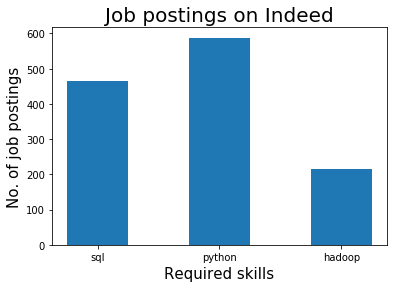

In [14]:
import matplotlib.pyplot as plt
import numpy as np

label = df_kw.loc[: ,'Keywords']

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, df_kw.loc[: ,'Number of jobs'], width = 0.5)
    plt.xlabel('Required skills', fontsize=15)
    plt.ylabel('No. of job postings', fontsize=15)
    plt.xticks(index, label, fontsize=10)
    plt.title('Job postings on Indeed', fontsize = 20)
    plt.show()

plot_bar_x()

In [7]:
jobdata.to_csv('indeed_dataScientistData.csv', index = False)